In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq


In [2]:
df = pd.read_csv(r'E:\Google Data Analysis\Files\google_dataset.csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [3]:
df.columns

Index(['# ----------------------------------------', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [5]:
df.shape

(3183, 10)

In [6]:
df.nunique() #Checking for unique values in each column

# ----------------------------------------       8
Unnamed: 1                                     673
Unnamed: 2                                     148
Unnamed: 3                                     181
Unnamed: 4                                     104
Unnamed: 5                                    2824
Unnamed: 6                                     809
Unnamed: 7                                    2026
Unnamed: 8                                     987
Unnamed: 9                                     679
dtype: int64

<Axes: >

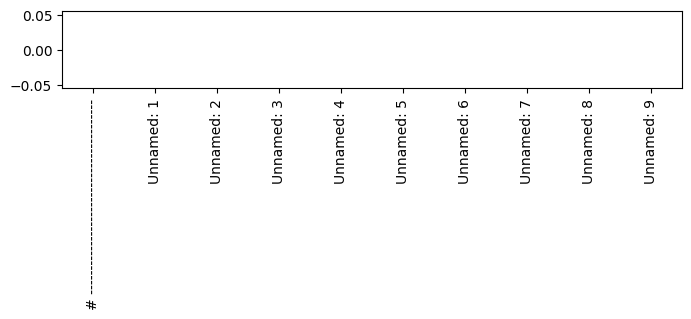

In [7]:
df.isnull().sum().plot(kind="bar", figsize=(8,1)) #Checking null values
#No null values found

## Q-1 : Write a Code to in which by just changing the keyword we can search for multiple things.

In [8]:
# Setup Pytrends library to connect to Google
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "cloud computing"

In [9]:
# Requesting data for the keyword
# pytrends.build_payload(kw_list=[keyword], timeframe='all')
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')
data = pytrends.interest_over_time()
data.reset_index(inplace=True)
data.head()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,date,cloud computing,isPartial
0,2024-09-15,56,False
1,2024-09-22,64,False
2,2024-09-29,55,False
3,2024-10-06,55,False
4,2024-10-13,59,False


# Q-2 : Create a Visualization Chart for Top 15 Countries where the keywords are searched the most.

In [10]:
#Country Wise 
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
country_data = country_data.sort_values(by=keyword, ascending=False).head(15)
print(country_data)


                          cloud computing
geoName                                  
Solomon Islands                       100
Nepal                                  79
St. Helena                             71
Lesotho                                71
St. Vincent & Grenadines               63
India                                  58
Zimbabwe                               52
Ethiopia                               50
Botswana                               46
Ghana                                  44
Kenya                                  42
Liberia                                42
Cameroon                               40
Sri Lanka                              40
Rwanda                                 36


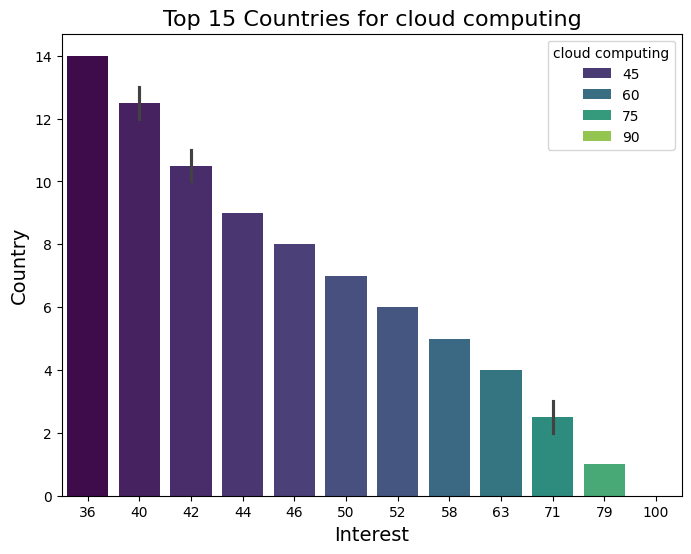

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x = country_data[keyword], y = country_data.index,  hue=country_data[keyword],palette="viridis", dodge=False)
plt.title(f'Top 15 Countries for {keyword}', fontsize=16)
plt.xlabel('Interest', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

# Q3: Create a world map that needs to be plotted showing the countries that search the keyword the most.

In [12]:
country_data = country_data.reset_index()
fig = px.choropleth(country_data, locations='geoName', locationmode='country names', color=keyword, 
                    color_continuous_scale='Inferno', title=f'Interest by Country for {keyword}')
fig.show()

# Q4 : We need to extract the time wise interest of the keyword how it trended in different year.

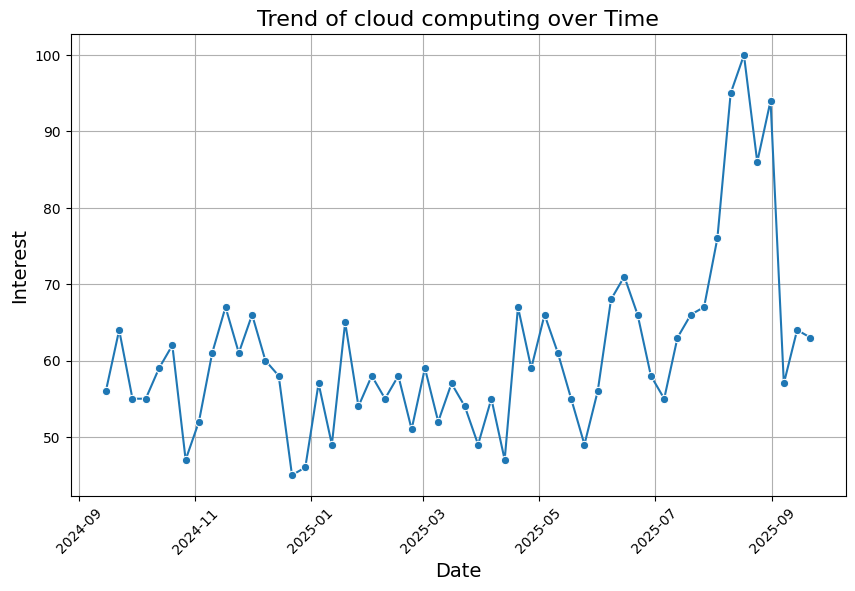

In [14]:
time_df = data[['date', keyword]]
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y=keyword, data=time_df, marker='o')
plt.title(f'Trend of {keyword} over Time', fontsize=16) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Interest', fontsize=14) 
plt.xticks(rotation=45)
plt.grid()
plt.show()